# Support Vector Machines (SVM)

This notebook is a Python implementation of the SVM exercise.

The data files used in this notebook can be donwloaded from our course's Moodle page.

In [264]:
import matplotlib.pyplot as plt  # for plotting
import numpy as np  # for number manipulation
import cvxpy as cp  # for solving convex programs

## Importing the Data

The first step is to import the data points from a file. The example instances are provided in plaintext files where every line describes a data point. Each line starts with either 1 or -1, which is the label of the data point (blue or red, respectively), followed by two floating point numbers representing the vector components of the data point.

You can specify the filename of the data you would like to use here.

In [265]:
filename = 'SVM_data_3.txt'  # can be from 'SVM_data_1.txt' to 'SVM_data_6.txt'

The code below imports the data points from a given file and saves them into two lists: `blue_points` and `red_points`, based on their label (1 is blue, -1 is red).

In [266]:
# Reads data from file and returns lists of blue and red points
def parse_blue_red(filename):
    # Reserve empty lists 
    blue_points = []
    red_points = []

    # Read data points from file
    with open(filename) as file:  # open desired file
        for line in file:  # read file line by line
            # Convert line into list of floats
            words = line.strip().split(' ')  # split into words by whitespaces, ignoring trailing whitespaces
            float_vector = [float(word) for word in words]  # convert strings into floats

            # Add data point to corresponding list based on its label
            if float_vector[0] == 1:
                blue_points.append(float_vector[1:])
            else:  # float_vector[0] == -1
                red_points.append(float_vector[1:])

    # Print out imported data
    print(f'Blue points: {blue_points}\n\nRed points: {red_points}\n')
    
    # Return generated lists
    return blue_points, red_points

In [267]:
# Load data from file
blue_points, red_points = parse_blue_red(filename)

Blue points: [[0.5507979025745755, 0.7081478226181048], [0.8929469543476547, 0.8962930889334381], [0.6491440476147607, 0.2784872826479753], [0.6762549019801313, 0.5908628174163508], [0.28352508177131874, 0.6931379183129963], [0.4404537176707395, 0.15686773847496327], [0.5446490180318447, 0.780314764511367]]

Red points: [[0.2909047389129443, 0.510827605197663], [0.12558531046383625, 0.20724287813818676], [0.05146720330082988, 0.44080984365063647], [0.029876210878566956, 0.4568332243947111], [0.023981882377165364, 0.558854087990882], [0.2592524469074654, 0.41510119701006964]]



## Plotting the Data

The function provided here plots the data and the output of the classifier (namely the region classified as blue) within the unit square.

Note that a classifier function should return True for points it classifies as blue and False for points it regards as red.

In [268]:
# Implements dummy classifier used by default by plotting function
def default_classifier(x, y):
    return x >= 0

# Plots data points and region identified as blue by classifier
def plot_data_with_classifier(blue_points=[[0, 0]], red_points=[[0, 0]], classifier=default_classifier):
    # Create canvas for plot
    plt.figure(figsize=(10, 10), dpi=80)
    
    # Plot blue region generated by classifier
    x_values = np.linspace(0, 1, 1000)
    y_values = np.linspace(0, 1, 1000)
    x, y = np.meshgrid(x_values, y_values)
    blue_region = (classifier(x, y))
    plt.imshow(blue_region, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='Blues', alpha=0.3)
    
    # Plot data points
    blue_points = np.asarray(blue_points)
    red_points = np.asarray(red_points)
    plt.scatter(blue_points[:, 0], blue_points[:, 1], marker='.', color='blue')
    plt.scatter(red_points[:, 0], red_points[:, 1], marker='.', color='red')
    
    # Display resulting image
    plt.show()

Below you can find a couple of usage examples.

In [269]:
# Example with default classifier function
#plot_data_with_classifier(blue_points, red_points)
# plot_data_with_classifier(blue_points, red_points, default_classifier)  # yields the same result

In [270]:
# Example with custom classifier function
def less_classifier(x, y):
    return x < y

#plot_data_with_classifier(blue_points, red_points, less_classifier)

## Implementing the SVM via a Convex Program

Now we implement the SVM via the convex program described in Section 2.4 of the script. The interface to the SVM function is as follows: it takes the lists of blue and red points as arguments and returns a classifier function. (As described above, classifier functions map points to True or False depending on the side of the line they lie on.)

In [271]:
# Returns SVM classifier for given blue and red points
def SVM(blue_points, red_points):
    blue_points = np.array(blue_points)
    red_points = np.array(red_points)
    # Add your code here...
    w = cp.Variable(2)
    b = cp.Variable()
    obj = cp.Minimize(cp.sum_squares(w))

    constraints = [
        w @ point + b >= 1 for point in blue_points
    ] + [
        w @ point + b <= -1 for point in red_points
    ]

    prob = cp.Problem(obj, constraints)
    prob.solve()
    print(w.value, b.value)

    # Define and return classifier function
    def classifier(x, y):
        points = np.stack([x, y], axis=-1)
        return (points @ w.value + b.value) >= 0
    return classifier

Now let us see how the SVM performs on the data we previously imported.

[43.50684916 12.7314006 ] -20.159899474445414


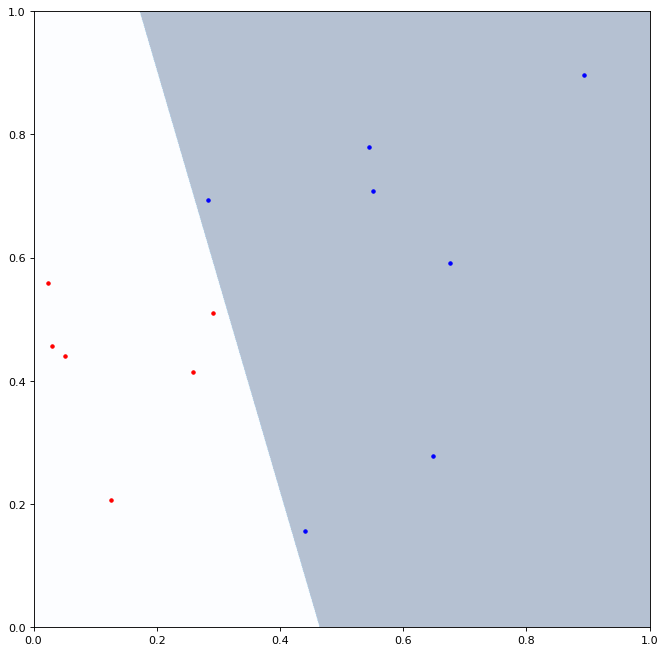

In [272]:
# Get classifier from SVM
classifier = SVM(blue_points, red_points)

# Visually check output of classifier
plot_data_with_classifier(blue_points, red_points, classifier)

## Feature Maps

Finally we implement SVMs with feature maps. The interface to the SVM function is similar, with the only difference being that we pass the function defining the feature map as the last parameter.

In [273]:
# Returns SVM classifier for given blue and red points and given feature map
def SVM_with_feature_map(blue_points, red_points, feature_map):
    blue_points = np.array([feature_map(x, y) for x, y in blue_points])
    red_points = np.array([feature_map(x, y) for x, y in red_points])

    # Add your code here...
    w = cp.Variable(blue_points[0].shape)
    b = cp.Variable()
    obj = cp.Minimize(cp.sum_squares(w))

    constraints = [
        w @ point + b >= 1 for point in blue_points
    ] + [
        w @ point + b <= -1 for point in red_points
    ]

    prob = cp.Problem(obj, constraints)
    prob.solve()
    print(w.value, b.value)

    # Define and return classifier function
    def classifier(x, y):
        x, y = np.atleast_1d(x), np.atleast_1d(y)  # Ensure x, y are at least 1D arrays
        
        # Flatten the meshgrid and apply the feature map to each point
        stacked_points = np.stack([x.ravel(), y.ravel()], axis=-1)  # Shape: (N*M, 2)
        
        # Apply feature_map to each point in a vectorized way
        transformed_points = np.array([feature_map(xi, yi) for xi, yi in stacked_points])
        decision_values=transformed_points @ w.value + b.value
        

        # Compute decision boundary values
        return decision_values.reshape(x.shape) >= 0

        # Reshape to match original grid dimensions
    return classifier

Potential feature maps, all defined on points $x \in \mathbb{R}^{2}$, are as follows:

*   $f(x) = x^{2}$
*   $f(x) = (x - (0.5,0.5))^{2}$
*   $f(x) = x_{2}$
*   $f(x) = (x_{2})^{2}$
*   $f(x) = (x_{2} - 0.5)^{2}$
*   $f(x) = (x_{1} - 0.5)^{2}$

These are implemented below.

In [274]:
# Implements x^2 feature map
def f_1(x, y):
    return [x, y, np.power(x, 2) + np.power(y, 2)]

# Implements x_2 feature map
def f_3(x, y):
    return [x, y, y]

# Add your implementations of other feature maps here...

Now we test our classifier on the additional data sets.

Blue points: [[0.29680050157622195, 0.18772122866125163], [0.4413092228959531, 0.1583098677126512], [0.4142350190810513, 0.29607993273364797], [0.5999291966249876, 0.26581911753550724], [0.2846858806413638, 0.2535882057737875], [0.3275639476887341, 0.14416430065342045], [0.024306561629486967, 0.20455554637995066], [0.02293309243908148, 0.577662858129756], [0.001642172716045276, 0.5154726119053935], [0.0022142125324435824, 0.4694883717575773], [0.029111563672717722, 0.08652568840220509], [0.11145381237802332, 0.25124511169054764], [0.3610484184638091, 0.03550903176033027], [0.05114280310134711, 0.18866773579310792], [0.3654777679121648, 0.24429086695790836], [0.10082727286264515, 0.3834090660671152], [0.3715126153280073, 0.01236941160035765], [0.5147379670006791, 0.44660782792231324]]

Red points: [[0.22199317108973948, 0.8707323061773764], [0.20671915533942642, 0.9186109079379216], [0.48841118879482914, 0.6117438629026457], [0.7659078564803156, 0.5184179878729432], [0.08074126876487486

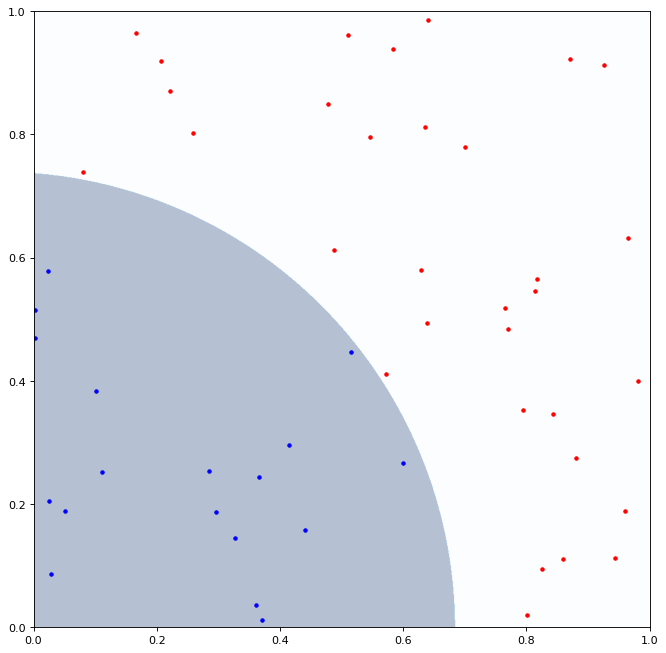

In [314]:
# Load data from file
filename = 'SVM_feature_3.txt'  # can be from 'SVM_feature_1.txt' to 'SVM_feature_3.txt'
blue_points, red_points = parse_blue_red(filename)

# Get classifier from SVM
classifier_f_1 = SVM_with_feature_map(blue_points, red_points, f_1)  # feature map can be from f_1 to f_6

# Visually check output of classifier
plot_data_with_classifier(blue_points, red_points, classifier_f_1)

## Bonus: 3D Plot of the Feature Space

We can also observe how classification looks like in the feature space. To achieve this, we need to plot the data points and the classification hyperplane in 3-dimensions (provided the feature space is 3-dimensional). This can be done after a small modification of our code for SVM, which will allow us to directly access the optimal normal vector and the shift constant from the convex program, rather than the resulting classifier function. The code below implements this functionality.

In [285]:
# Returns normal vector and shift constant of SVM classifier for given blue and red points and given feature map
def hyperplane_SVM_with_feature_map(blue_points, red_points, feature_map):
    blue_points = np.array([feature_map(x, y) for x, y in blue_points])
    red_points = np.array([feature_map(x, y) for x, y in red_points])

    # Add your code here...
    w = cp.Variable(blue_points[0].shape)
    b = cp.Variable()
    obj = cp.Minimize(cp.sum_squares(w))

    constraints = [
        w @ point + b >= 1 for point in blue_points
    ] + [
        w @ point + b <= -1 for point in red_points
    ]

    prob = cp.Problem(obj, constraints)
    prob.solve()
    print(w.value, b.value)
    return w.value, b.value

The following function is used to produce the 3D plot.

In [293]:
# Plots data points and classification hyperplane
def plot_3d_data_with_classifier(blue_points=[[0, 0]], red_points=[[0, 0]], feature_map=f_3,
                                 normal=(1, 1, 1), shift=0, view_elevation=20, view_azimuth=0):
    # Create 3d canvas for plot
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = fig.add_subplot(projection='3d')
    
    # Plot classification hyperplane
    x_values = np.linspace(0, 1, 1000)
    y_values = np.linspace(0, 1, 1000)
    x, y = np.meshgrid(x_values, y_values)
    z = (-normal[0] * x - normal[1] * y - shift) * 1. / normal[2]
    ax.plot_surface(x, y, z, cmap='Blues', alpha=0.3)

    # Plot data points
    blue_points_xyz = np.asarray([feature_map(*point) for point in blue_points])
    red_points_xyz = np.asarray([feature_map(*point) for point in red_points])
    ax.scatter(blue_points_xyz[:, 0], blue_points_xyz[:, 1], blue_points_xyz[:, 2], marker='.', color='blue')
    ax.scatter(red_points_xyz[:, 0], red_points_xyz[:, 1], red_points_xyz[:, 2], marker='.', color='red')
    
    # Display resulting image
    ax.view_init(view_elevation, view_azimuth)
    plt.show()

Now we can generate the 3D plot for any data set.

In [311]:
# Load data from file
filename = 'SVM_feature_3.txt'  # can be from 'SVM_feature_1.txt' to 'SVM_feature_3.txt'
blue_points, red_points = parse_blue_red(filename)

# Get classifier from SVM
normal_f_1, shift_f_1 = hyperplane_SVM_with_feature_map(blue_points, red_points, f_1)  # feature map can be from f_1 to f_6

Blue points: [[0.29680050157622195, 0.18772122866125163], [0.4413092228959531, 0.1583098677126512], [0.4142350190810513, 0.29607993273364797], [0.5999291966249876, 0.26581911753550724], [0.2846858806413638, 0.2535882057737875], [0.3275639476887341, 0.14416430065342045], [0.024306561629486967, 0.20455554637995066], [0.02293309243908148, 0.577662858129756], [0.001642172716045276, 0.5154726119053935], [0.0022142125324435824, 0.4694883717575773], [0.029111563672717722, 0.08652568840220509], [0.11145381237802332, 0.25124511169054764], [0.3610484184638091, 0.03550903176033027], [0.05114280310134711, 0.18866773579310792], [0.3654777679121648, 0.24429086695790836], [0.10082727286264515, 0.3834090660671152], [0.3715126153280073, 0.01236941160035765], [0.5147379670006791, 0.44660782792231324]]

Red points: [[0.22199317108973948, 0.8707323061773764], [0.20671915533942642, 0.9186109079379216], [0.48841118879482914, 0.6117438629026457], [0.7659078564803156, 0.5184179878729432], [0.08074126876487486

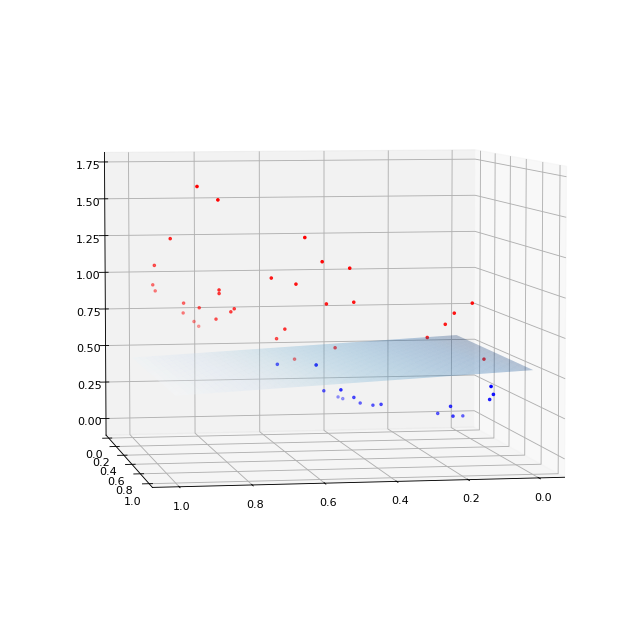

In [312]:
# Visually check output of classifier
view_elevation, view_azimuth = 20, 0  # viewing angles; feel free to modify these to examine plot from all sides
plot_3d_data_with_classifier(blue_points, red_points, f_1, normal_f_1, shift_f_1, view_elevation=5, view_azimuth=80)